# Setup

In [1]:
#Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import ks_2samp
from nilearn import plotting

In [2]:
# Data
df = pd.read_csv('/home/sebastian-mesch-henriques/Escritorio/Tesis_grado/version_final/main/vectores.csv')

In [3]:
#Labels

roi_labels = np.array(['Giro Precentral Izquierdo', 'Giro Precentral Derecho', 'Giro Frontal Superior 2 Izquierdo', 'Giro Frontal Superior 2 Derecho',
                       'Giro Frontal Medio 2 Izquierdo', 'Giro Frontal Medio 2 Derecho', 'Giro Frontal Inferior Opercular Izquierdo',
                       'Giro Frontal Inferior Opercular Derecho', 'Giro Frontal Inferior Triangular Izquierdo', 'Giro Frontal Inferior Triangular Derecho',
                       'Giro Frontal Inferior Orbital 2 Izquierdo', 'Giro Frontal Inferior Orbital 2 Derecho', 'Operculo Rolándico Izquierdo',
                       'Operculo Rolándico Derecho', 'Área Motora Suplementaria Izquierdo', 'Área Motora Suplementaria Derecho', 'Corteza Olfatoria Izquierdo',
                       'Corteza Olfatoria Derecho', 'Giro Frontal Superior Medial Izquierdo', 'Giro Frontal Superior Medial Derecho',
                       'Giro Frontal Medial Orbital Izquierdo', 'Giro Frontal Medial Orbital Derecho', 'Giro Recto Izquierdo', 'Giro Recto Derecho', 'OFC Medial Izquierdo',
                       'OFC Medial Derecho', 'OFC Anterior Izquierdo', 'OFC Anterior Derecho', 'OFC Posterior Izquierdo', 'OFC Posterior Derecho', 'OFC Lateral Izquierdo',
                       'OFC Lateral Derecho', 'Ínsula Izquierdo', 'Ínsula Derecho', 'Giro Cingulado Anterior Izquierdo', 'Giro Cingulado Anterior Derecho',
                       'Giro Cingulado Medio Izquierdo', 'Giro Cingulado Medio Derecho', 'Giro Cingulado Posterior Izquierdo', 'Giro Cingulado Posterior Derecho',
                       'Hipocampo Izquierdo', 'Hipocampo Derecho', 'Giro Parahipocampal Izquierdo', 'Giro Parahipocampal Derecho',
                       'Amígdala Izquierdo', 'Amígdala Derecho', 'Calcarina Izquierdo', 'Calcarina Derecho', 'Cuña Izquierdo',
                       'Cuña Derecho', 'Giro Lingual Izquierdo', 'Giro Lingual Derecho', 'Giro Occipital Superior Izquierdo', 'Giro Occipital Superior Derecho',
                       'Giro Occipital Medio Izquierdo', 'Giro Occipital Medio Derecho', 'Giro Occipital Inferior Izquierdo', 'Giro Occipital Inferior Derecho',
                       'Giro Fusiforme Izquierdo', 'Giro Fusiforme Derecho', 'Giro Postcentral Izquierdo', 'Giro Postcentral Derecho',
                       'Giro Parietal Superior Izquierdo', 'Giro Parietal Superior Derecho', 'Giro Parietal Inferior Izquierdo', 'Giro Parietal Inferior Derecho',
                       'Giro SupraMarginal Izquierdo', 'Giro SupraMarginal Derecho', 'Giro Angular Izquierdo', 'Giro Angular Derecho', 'Precúnea Izquierdo',
                       'Precúnea Derecho', 'Lóbulo Paracentral Izquierdo', 'Lóbulo Paracentral Derecho', 'Núcleo Caudado Izquierdo',
                       'Núcleo Caudado Derecho', 'Putamen Izquierdo', 'Putamen Derecho', 'Pálido Izquierdo', 'Pálido Derecho',
                       'Tálamo Izquierdo', 'Tálamo Derecho', 'Giro de Heschl Izquierdo', 'Giro de Heschl Derecho', 'Giro Temporal Superior Izquierdo',
                       'Giro Temporal Superior Derecho', 'Polo Temporal Superior Izquierdo', 'Polo Temporal Superior Derecho',
                       'Giro Temporal Medio Izquierdo', 'Giro Temporal Medio Derecho', 'Polo Temporal Medio Izquierdo',
                       'Polo Temporal Medio Derecho', 'Giro Temporal Inferior Izquierdo', 'Giro Temporal Inferior Derecho'])

print(roi_labels)



['Giro Precentral Izquierdo' 'Giro Precentral Derecho'
 'Giro Frontal Superior 2 Izquierdo' 'Giro Frontal Superior 2 Derecho'
 'Giro Frontal Medio 2 Izquierdo' 'Giro Frontal Medio 2 Derecho'
 'Giro Frontal Inferior Opercular Izquierdo'
 'Giro Frontal Inferior Opercular Derecho'
 'Giro Frontal Inferior Triangular Izquierdo'
 'Giro Frontal Inferior Triangular Derecho'
 'Giro Frontal Inferior Orbital 2 Izquierdo'
 'Giro Frontal Inferior Orbital 2 Derecho' 'Operculo Rolándico Izquierdo'
 'Operculo Rolándico Derecho' 'Área Motora Suplementaria Izquierdo'
 'Área Motora Suplementaria Derecho' 'Corteza Olfatoria Izquierdo'
 'Corteza Olfatoria Derecho' 'Giro Frontal Superior Medial Izquierdo'
 'Giro Frontal Superior Medial Derecho'
 'Giro Frontal Medial Orbital Izquierdo'
 'Giro Frontal Medial Orbital Derecho' 'Giro Recto Izquierdo'
 'Giro Recto Derecho' 'OFC Medial Izquierdo' 'OFC Medial Derecho'
 'OFC Anterior Izquierdo' 'OFC Anterior Derecho' 'OFC Posterior Izquierdo'
 'OFC Posterior Derecho

In [4]:
# Construir un diccionario de características (i, j) -> 'ROI_label_i - ROI_label_j'
feature_labels = []
for i in range(len(roi_labels)):
    for j in range(i + 1, len(roi_labels)):
        feature_labels.append(f'{roi_labels[i]} - {roi_labels[j]}')

# Asignar los nombres generados a las columnas del DataFrame
feature_labels.append('condicion')  # Añadir 'condicion' al final
df.columns = feature_labels

# Reemplazar valores de 'condicion' según la convención
df["condicion"] = df["condicion"].replace("CONT", 0)
df["condicion"] = df["condicion"].replace("AUT", 1)

# Separar los datos en características y condición
features = df.drop('condicion', axis=1)
condicion = df['condicion']

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, condicion, stratify=condicion, test_size=0.3, random_state=42)

# Dummy classifier

Baseline accuracy: 0.5171232876712328


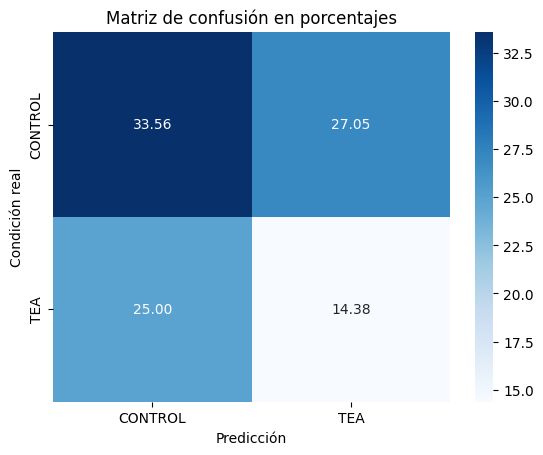

In [32]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")

dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

baseline_accuracy = dummy_clf.score(X_test, y_test)
print(f"Baseline accuracy: {baseline_accuracy}")

conf_mat = confusion_matrix(y_test, y_pred)
# Convertir la matriz de confusión a porcentajes
conf_matrix_percentage = conf_mat / np.sum(conf_mat) * 100

sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['CONTROL', 'TEA'], yticklabels=['CONTROL', 'TEA'])
plt.xlabel('Predicción')
plt.ylabel('Condición real')
plt.title('Matriz de confusión en porcentajes')
plt.show()

# Modelo

Precisión en el entrenamiento: 0.95
Puntuación AUC en el entrenamiento: 0.99
Informe de clasificación del entrenamiento:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       414
           1       0.93      0.94      0.94       267

    accuracy                           0.95       681
   macro avg       0.95      0.95      0.95       681
weighted avg       0.95      0.95      0.95       681

Precisión en el test: 0.7123287671232876
Puntuación AUC en el test: 0.7850650945713584
Informe de clasificación del test:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       177
           1       0.64      0.62      0.63       115

    accuracy                           0.71       292
   macro avg       0.70      0.70      0.70       292
weighted avg       0.71      0.71      0.71       292



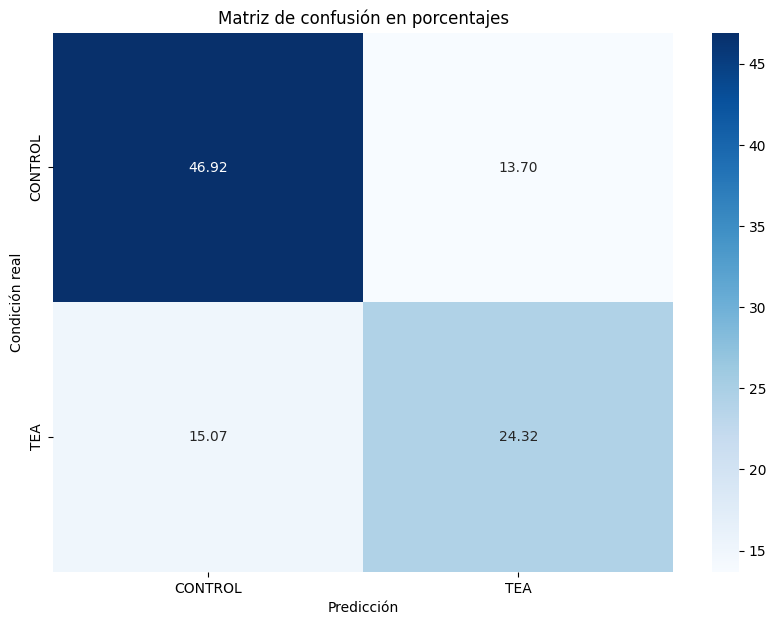

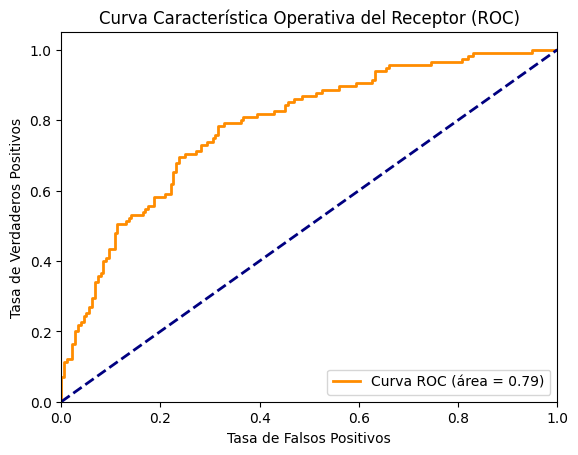

In [46]:
# Definir el pipeline con SelectFromModel (RandomForest), SMOTE, StandardScaler y LogisticRegression
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Definir la grid de hiperparámetros

param_grid = {
    'logreg__penalty': ['l2'],
    'logreg__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'logreg__solver': ['liblinear', 'newton-cg']
}


# Definir StratifiedKFold
stratified_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Definir el GridSearchCV con AUC como scoring
grid_search = GridSearchCV(pipeline, param_grid, cv=stratified_kf, scoring='roc_auc', n_jobs=-1)

# Ajustar y realizar la validación cruzada en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Predicciones en el conjunto de entrenamiento
y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]

# Evaluar el modelo en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred_proba)
classification_report_train = classification_report(y_train, y_train_pred, digits=2)

print(f"Precisión en el entrenamiento: {train_accuracy:.2f}")
print(f"Puntuación AUC en el entrenamiento: {train_auc:.2f}")
print("Informe de clasificación del entrenamiento:")
print(classification_report_train)

# Evaluar el modelo en el conjunto de prueba utilizando el pipeline completo
y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]


test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_pred_proba)
classification_report_test = classification_report(y_test, y_test_pred, digits=2)

print(f"Precisión en el test: {test_accuracy}")
print(f"Puntuación AUC en el test: {test_auc}")
print("Informe de clasificación del test:")
print(classification_report_test)

# Graficar la matriz de confusión para el conjunto de prueba
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Convertir la matriz de confusión a porcentajes
conf_matrix_percentage = conf_matrix / np.sum(conf_matrix) * 100

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['CONTROL', 'TEA'], yticklabels=['CONTROL', 'TEA'])
plt.xlabel('Predicción')
plt.ylabel('Condición real')
plt.title('Matriz de confusión en porcentajes')
plt.show()

# Graficar la curva ROC para el conjunto de prueba
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

Coeficientes del modelo:
                                         Característica  Coeficiente
176   Giro Frontal Medio 2 Derecho - Giro Angular Iz...     0.109267
374   Giro Frontal Inferior Orbital 2 Derecho - OFC ...     0.090657
1610  Tálamo Izquierdo - Giro Temporal Superior Derecho     0.089771
88    Giro Frontal Superior 2 Izquierdo - Precúnea I...     0.086191
944   OFC Lateral Derecho - Lóbulo Paracentral Izqui...     0.084148
...                                                 ...          ...
1598                  Pálido Izquierdo - Tálamo Derecho    -0.087341
904   OFC Posterior Derecho - Polo Temporal Superior...    -0.088043
1079  Giro Cingulado Posterior Izquierdo - Giro Cing...    -0.088477
1571  Lóbulo Paracentral Derecho - Polo Temporal Med...    -0.093991
424     Operculo Rolándico Izquierdo - Pálido Izquierdo    -0.094724

[1649 rows x 2 columns]


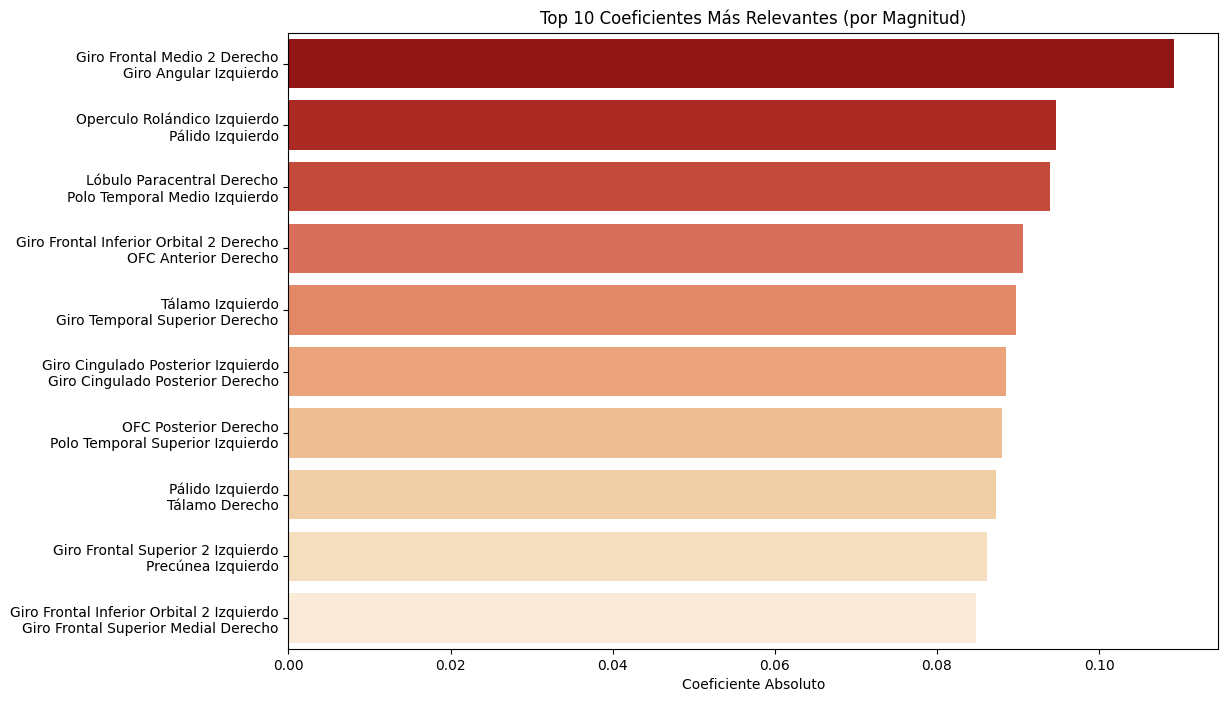

In [7]:
# Coeficientes

# Obtener coeficientes del modelo
coefficients = best_model.named_steps['logreg'].coef_[0]
selected_features = features.columns[best_model.named_steps['feature_selection'].get_support()]

# Asegurarse de que las longitudes coincidan
if len(selected_features) == len(coefficients):
    coef_df = pd.DataFrame({'Característica': selected_features, 'Coeficiente': coefficients})
    print("Coeficientes del modelo:")
    print(coef_df.sort_values(by='Coeficiente', ascending=False))
    
    # Seleccionar los 10 coeficientes más relevantes (las magnitudes más grandes)
    coef_df['Coeficiente Absoluto'] = coef_df['Coeficiente'].abs()
    top_10_coefs = coef_df.nlargest(10, 'Coeficiente Absoluto')

    # Crear el barplot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coeficiente Absoluto', y='Característica', data=top_10_coefs, palette = "OrRd")
    plt.title('Top 10 Coeficientes Más Relevantes (por Magnitud)')
    plt.xlabel('Coeficiente Absoluto')
    # plt.ylabel('')
    ax = sns.barplot(x='Coeficiente Absoluto', y='Característica', data=top_10_coefs, palette="OrRd_r")
    # Ajustar las etiquetas
    ax.set_yticklabels([label.replace(" - ", "\n") for label in top_10_coefs['Característica']], rotation=0, ha='right')
    ax.set_ylabel('')


    plt.show()


Coeficientes del modelo:
                                         Característica  Coeficiente
176   Giro Frontal Medio 2 Derecho - Giro Angular Iz...     0.109267
374   Giro Frontal Inferior Orbital 2 Derecho - OFC ...     0.090657
1610  Tálamo Izquierdo - Giro Temporal Superior Derecho     0.089771
88    Giro Frontal Superior 2 Izquierdo - Precúnea I...     0.086191
944   OFC Lateral Derecho - Lóbulo Paracentral Izqui...     0.084148
...                                                 ...          ...
1598                  Pálido Izquierdo - Tálamo Derecho    -0.087341
904   OFC Posterior Derecho - Polo Temporal Superior...    -0.088043
1079  Giro Cingulado Posterior Izquierdo - Giro Cing...    -0.088477
1571  Lóbulo Paracentral Derecho - Polo Temporal Med...    -0.093991
424     Operculo Rolándico Izquierdo - Pálido Izquierdo    -0.094724

[1649 rows x 2 columns]


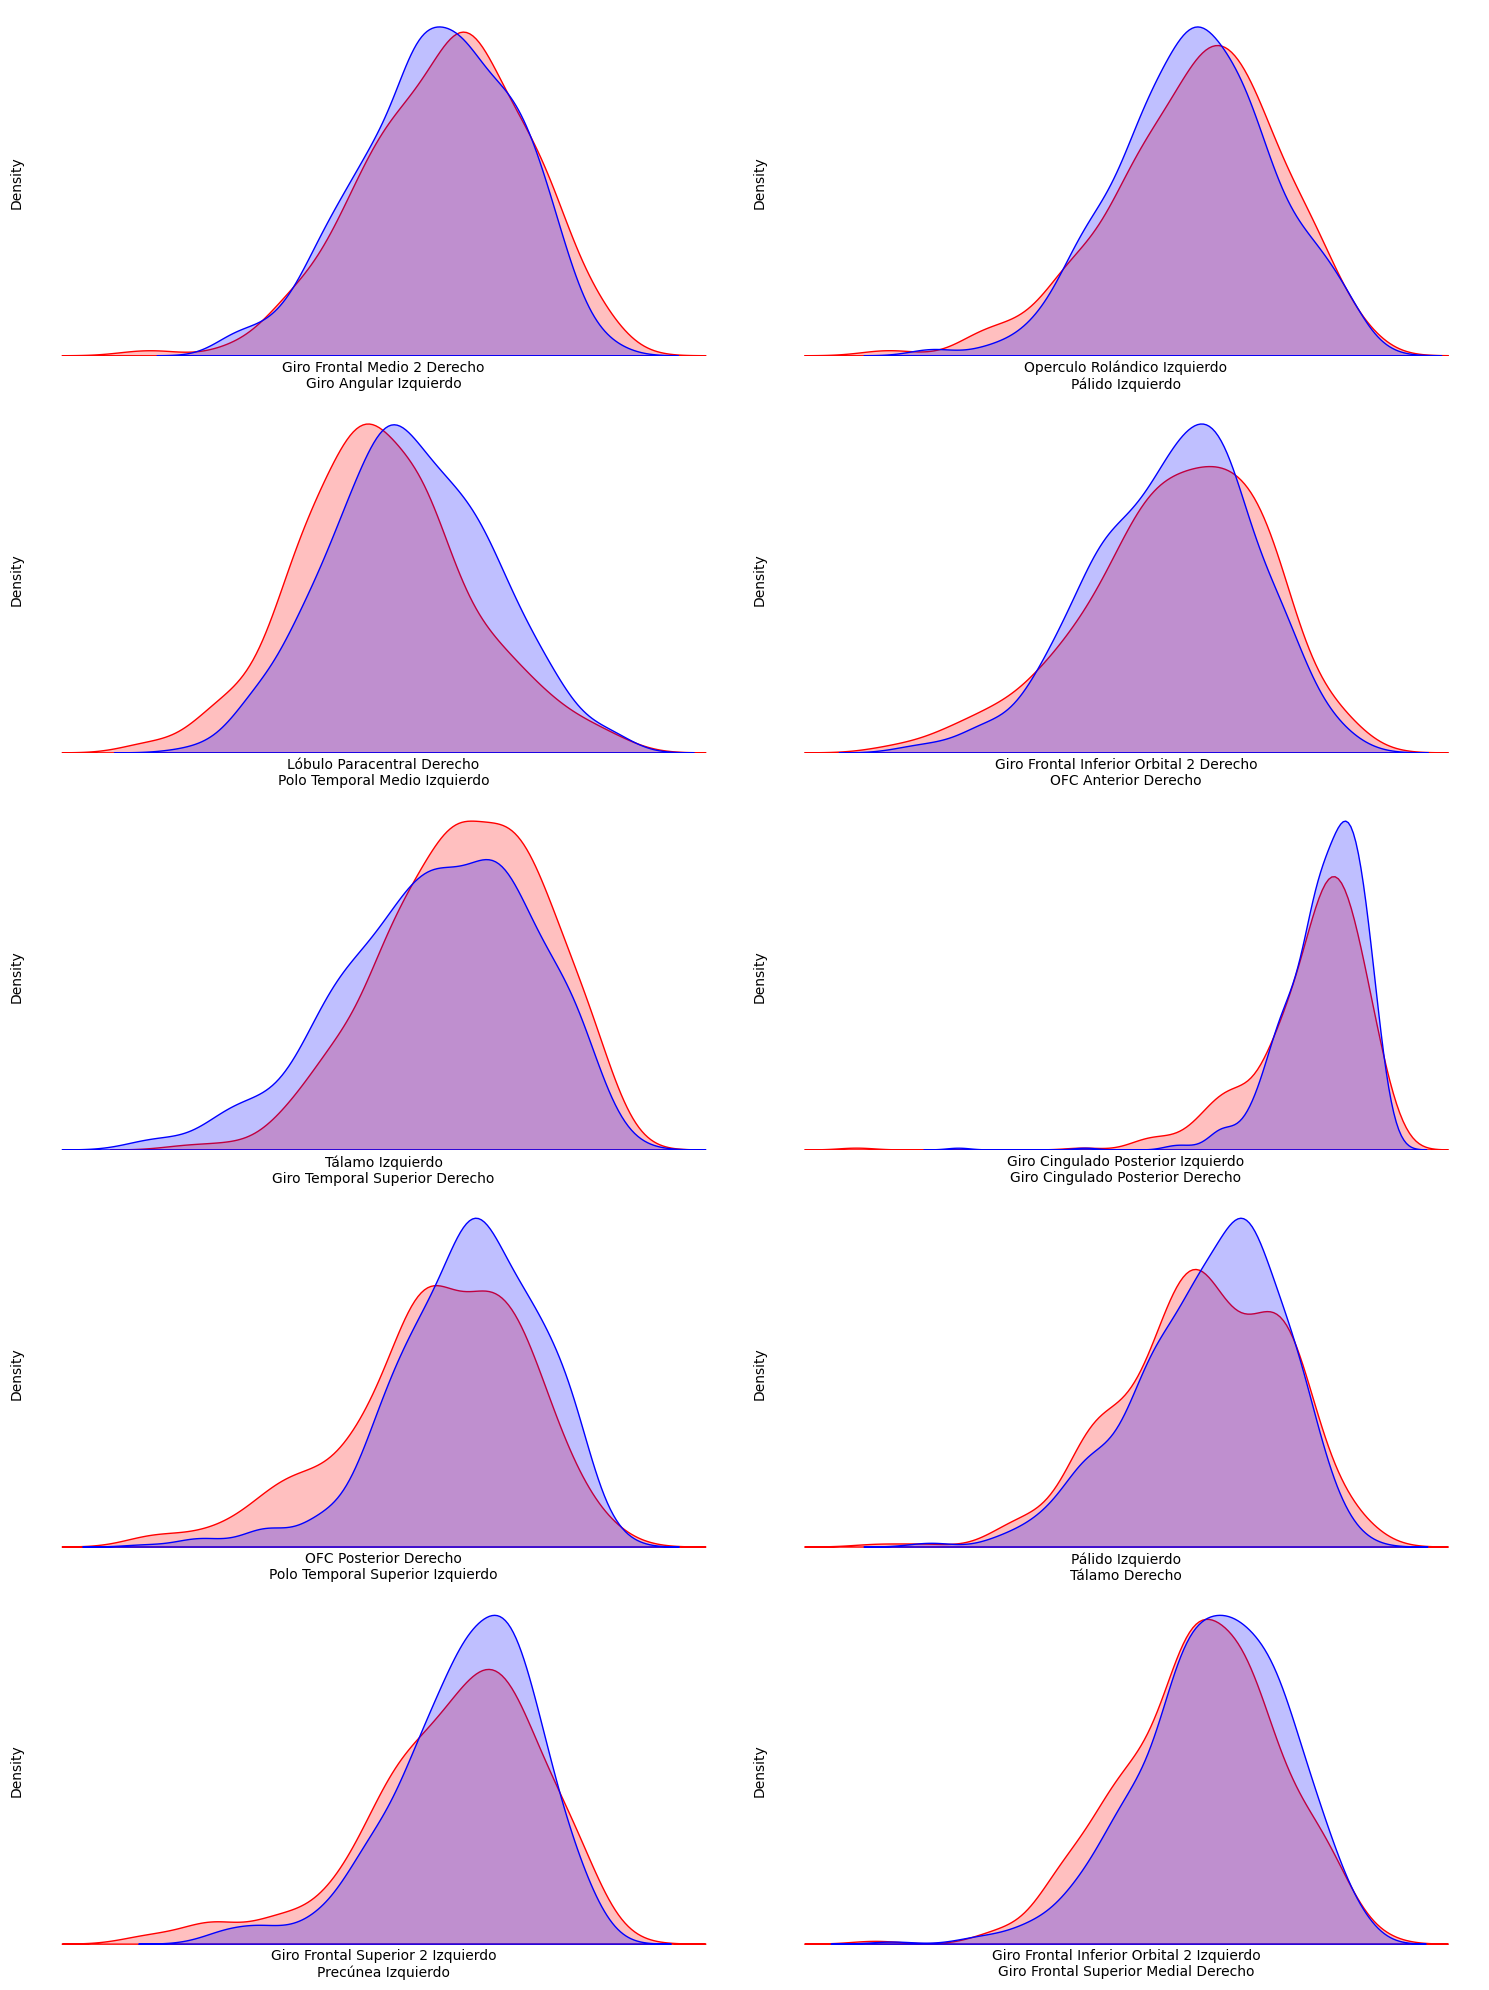

,Característica,β,Prueba de Kolmogórov-Smirnov (KS),P-valor KS,Significancia KS,Prueba de U de Mann-Whitney,P-valor U de Mann-Whitney,Significancia U de Mann-Whitney
0,Giro Frontal Medio 2 Derecho - Giro Angular Iz...,0.11,0.06,0.36,False,119054.0,0.15,False
1,Operculo Rolándico Izquierdo - Pálido Izquierdo,-0.09,0.06,0.43,False,116382.0,0.41,False
2,Lóbulo Paracentral Derecho - Polo Temporal Med...,-0.09,0.17,0.00,True,90358.0,0.00,True
3,Giro Frontal Inferior Orbital 2 Derecho - OFC ...,0.09,0.07,0.15,False,117360.0,0.30,False
4,Tálamo Izquierdo - Giro Temporal Superior Derecho,0.09,0.13,0.00,True,130499.0,0.00,True
5,Giro Cingulado Posterior Izquierdo - Giro Cing...,-0.09,0.10,0.01,True,97939.0,0.00,True
6,OFC Posterior Derecho - Polo Temporal Superior...,-0.09,0.18,0.00,True,91083.0,0.00,True
7,Pálido Izquierdo - Tálamo Derecho,-0.09,0.09,0.05,False,107810.0,0.24,False
8,Giro Frontal Superior 2 Izquierdo - Precúnea I...,0.09,0.09,0.06,False,105889.0,0.10,False
9,Giro Frontal Inferior Orbital 2 Izquierdo - Gi...,-0.08,0.10,0.02,True,101296.0,0.01,True


La tabla ha sido guardada como 'resultados_pruebas.csv'.


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ks_2samp

# Asegurarse de que las longitudes coincidan
if len(selected_features) == len(coefficients):
    coef_df = pd.DataFrame({'Característica': selected_features, 'Coeficiente': coefficients})
    print("Coeficientes del modelo:")
    print(coef_df.sort_values(by='Coeficiente', ascending=False))
    
    # Seleccionar los 10 coeficientes más relevantes (las magnitudes más grandes)
    coef_df['Coeficiente Absoluto'] = coef_df['Coeficiente'].abs()
    top_10_coefs = coef_df.nlargest(10, 'Coeficiente Absoluto')
    
    # Graficar la distribución comparada entre autista y control para cada característica
    plt.figure(figsize=(15, 20))

    top_10_features = top_10_coefs['Característica']  # Las características seleccionadas

    results = []

    for i, feature in enumerate(top_10_features):
        plt.subplot(5, 2, i + 1)

        autistas = df[df['condicion'] == 1][feature]
        controles = df[df['condicion'] == 0][feature]

        sns.kdeplot(autistas, color='red', fill=True)
        sns.kdeplot(controles, color='blue', fill=True)

        sns.despine(left=True, bottom=True)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(feature.replace(" - ", "\n"))
        plt.gca().xaxis.set_tick_params(width=0)
        plt.gca().yaxis.set_tick_params(width=0)

        # Realizar las pruebas KS y Mann-Whitney U
        ks_stat, ks_p_value = ks_2samp(autistas.dropna(), controles.dropna())
        mw_stat, mw_p_value = mannwhitneyu(autistas.dropna(), controles.dropna())

        coef_value = coef_df[coef_df['Característica'] == feature]['Coeficiente'].values[0]

        results.append((feature, coef_value, ks_stat, ks_p_value, mw_stat, mw_p_value))

    plt.tight_layout()
    plt.show()
    
    # Crear un DataFrame con los resultados
    results_df = pd.DataFrame(results, columns=['Característica', 'Coeficiente', 'KS Statistic', 'KS P-value', 'Mann-Whitney U Statistic', 'Mann-Whitney U P-value'])
    
    # Redondear los valores a dos decimales
    results_df = results_df.round(2)
    
    # Comparar los p-values con 0.05
    results_df['KS Significant'] = results_df['KS P-value'] < 0.05
    results_df['Mann-Whitney U Significant'] = results_df['Mann-Whitney U P-value'] < 0.05
    
    # Reorganizar las columnas
    results_df = results_df[['Característica', 'Coeficiente', 'KS Statistic', 'KS P-value', 'KS Significant', 
                             'Mann-Whitney U Statistic', 'Mann-Whitney U P-value', 'Mann-Whitney U Significant']]
    
    # Cambiar los nombres de las columnas
    results_df.columns = ['Característica', 'β', 'Prueba de Kolmogórov-Smirnov (KS)', 'P-valor KS', 'Significancia KS', 
                          'Prueba de U de Mann-Whitney', 'P-valor U de Mann-Whitney', 'Significancia U de Mann-Whitney']
    
    display(results_df)
    
    # Guardar la tabla en un archivo CSV
    results_df.to_csv('resultados_pruebas.csv', index=False)
    
    print("La tabla ha sido guardada como 'resultados_pruebas.csv'.")
else:
    print("Error: La longitud de las características seleccionadas y los coeficientes no coinciden.")


Coeficientes del modelo:
                                         Característica  Coeficiente
176   Giro Frontal Medio 2 Derecho - Giro Angular Iz...     0.109267
374   Giro Frontal Inferior Orbital 2 Derecho - OFC ...     0.090657
1610  Tálamo Izquierdo - Giro Temporal Superior Derecho     0.089771
88    Giro Frontal Superior 2 Izquierdo - Precúnea I...     0.086191
944   OFC Lateral Derecho - Lóbulo Paracentral Izqui...     0.084148
...                                                 ...          ...
1598                  Pálido Izquierdo - Tálamo Derecho    -0.087341
904   OFC Posterior Derecho - Polo Temporal Superior...    -0.088043
1079  Giro Cingulado Posterior Izquierdo - Giro Cing...    -0.088477
1571  Lóbulo Paracentral Derecho - Polo Temporal Med...    -0.093991
424     Operculo Rolándico Izquierdo - Pálido Izquierdo    -0.094724

[1649 rows x 2 columns]


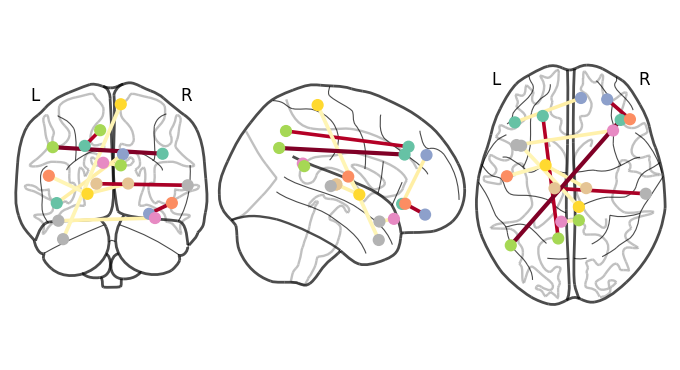

In [34]:
# Cargar las coordenadas de las ROIs
coords_df = pd.read_csv('rois_coordinates.csv')
coords = coords_df[['x', 'y', 'z']].values.tolist()


# Asegurarse de que las longitudes coincidan
if len(selected_features) == len(coefficients):
    coef_df = pd.DataFrame({'Característica': selected_features, 'Coeficiente': coefficients})
    print("Coeficientes del modelo:")
    print(coef_df.sort_values(by='Coeficiente', ascending=False))

    # Seleccionar los 10 coeficientes más relevantes (las magnitudes más grandes)
    coef_df['Coeficiente Absoluto'] = coef_df['Coeficiente'].abs()
    top_10_coefs = coef_df.nlargest(10, 'Coeficiente Absoluto')

    # Crear una nueva matriz de conectividad solo con las 10 características más importantes
    new_connectome = np.zeros((len(roi_labels), len(roi_labels)))

    for feature in top_10_coefs['Característica']:
        i, j = feature.split(' - ')
        i_idx = np.where(roi_labels == i)[0][0]
        j_idx = np.where(roi_labels == j)[0][0]
        new_connectome[i_idx, j_idx] = top_10_coefs[top_10_coefs['Característica'] == feature]['Coeficiente'].values[0]
        new_connectome[j_idx, i_idx] = top_10_coefs[top_10_coefs['Característica'] == feature]['Coeficiente'].values[0]  # Simetría

    # Identificar los nodos con conexiones
    connected_nodes = np.unique(np.where(new_connectome != 0)[0])

    # Filtrar las coordenadas y la matriz de conectividad
    filtered_coords = [coords[i] for i in connected_nodes]
    filtered_connectome = new_connectome[np.ix_(connected_nodes, connected_nodes)]

    # Graficar la conectividad funcional utilizando nilearn
    plotting.plot_connectome(filtered_connectome, filtered_coords, node_size=60, edge_cmap='YlOrRd')
    plt.show()


In [10]:
print(filtered_coords)
len(filtered_coords)

[[-20.18170606372045, 35.92394655704007, 35.24563206577595], [38.77784640724727, 32.904673666872554, 29.301214741610053], [-41.37346437346437, 31.056511056511056, -8.076167076167074], [45.82608695652175, 33.418764302059486, -7.988558352402748], [-47.378542510121456, -9.751012145748987, 12.635627530364374], [8.75070290534208, 49.52858481724462, 28.92689784442362], [28.601851851851848, 48.46296296296296, -16.1820987654321], [33.042857142857144, 24.867857142857133, -19.4], [-6.188295165394408, -44.16793893129771, 22.463104325699742], [7.141141141141148, -43.09309309309309, 20.51651651651652], [-44.42491467576792, -62.08532423208191, 34.27815699658703], [-8.48628192999054, -56.90192368338063, 47.13213497319458], [7.126794258373209, -32.942583732057415, 66.79186602870814], [-18.061433447098977, -1.3583617747440258, -1.0443686006825883], [-11.30091743119266, -18.869724770642208, 6.60366972477064], [12.703878902554392, -18.768211920529808, 6.728476821192047], [57.83253740846865, -23.010506208

19